In [1]:
from google.colab import files
uploaded = files.upload()

Saving Movies.csv to Movies.csv


In [5]:
import pandas as pd
df = pd.read_csv("Movies.csv", sep=',')

df.head()

,Unnamed: 0,id,title,original_language,release_date,genre_ids,popularity,vote_average,vote_count
0,0,616037,Thor: Love and Thunder,en,2022-07-06,"[28, 12, 14]",7709.008,6.8,1803
1,1,766507,Prey,en,2022-08-02,"[28, 53, 878, 27]",8775.992,8.2,2006
2,2,507086,Jurassic World Dominion,en,2022-06-01,"[12, 28, 878]",4775.953,7.1,2706
3,3,438148,Minions: The Rise of Gru,en,2022-06-29,"[10751, 16, 12, 35, 14]",4499.308,7.8,1273
4,4,361743,Top Gun: Maverick,en,2022-05-24,"[28, 18]",3952.536,8.3,1877


In [6]:
# Shape of the dataset
print("Shape:", df.shape)
# Column names
print("Columns:", df.columns.tolist())
# Data types and non-null values
df.info()
# Summary statistics for numeric features
df.describe()

Shape: (22300, 9)
Columns: ['Unnamed: 0', 'id', 'title', 'original_language', 'release_date', 'genre_ids', 'popularity', 'vote_average', 'vote_count']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22300 entries, 0 to 22299
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         22300 non-null  int64  
 1   id                 22300 non-null  int64  
 2   title              22300 non-null  object 
 3   original_language  22300 non-null  object 
 4   release_date       22218 non-null  object 
 5   genre_ids          22300 non-null  object 
 6   popularity         22300 non-null  float64
 7   vote_average       22300 non-null  float64
 8   vote_count         22300 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 1.5+ MB


,Unnamed: 0,id,popularity,vote_average,vote_count
count,22300.000000,2.230000e+04,22300.000000,22300.000000,22300.000000
mean,11149.500000,2.854277e+05,53.513291,6.315256,1601.838565
std,6437.599837,2.998069e+05,193.496412,1.447448,2998.123814
min,0.000000,3.000000e+00,6.973000,0.000000,0.000000
25%,5574.750000,1.249800e+04,16.753000,5.900000,118.000000
50%,11149.500000,1.743160e+05,24.111500,6.500000,467.000000
75%,16724.250000,5.133100e+05,46.751000,7.200000,1599.000000
max,22299.000000,1.008270e+06,8775.992000,10.000000,32036.000000


In [7]:
# Check for missing values
print(df.isnull().sum())
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

Unnamed: 0            0
id                    0
title                 0
original_language     0
release_date         82
genre_ids             0
popularity            0
vote_average          0
vote_count            0
dtype: int64
Duplicate rows: 0


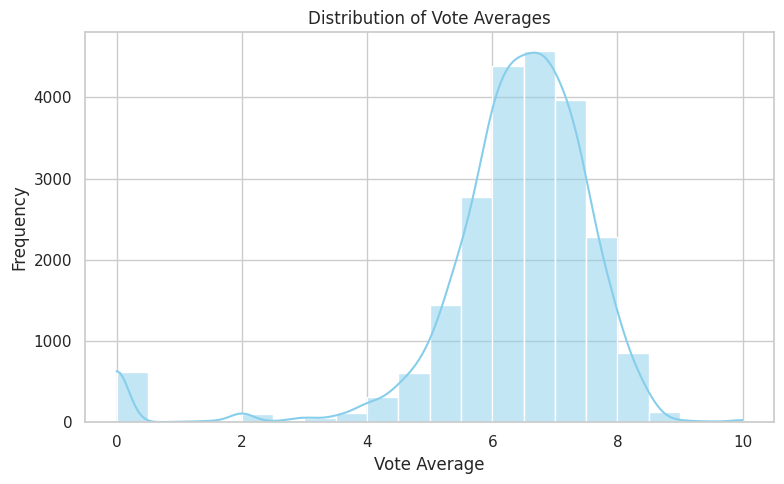

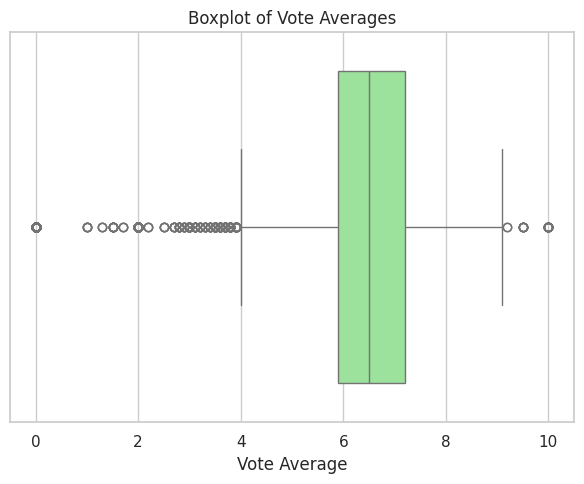

In [12]:
#Visualize a Few Features
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Visualization: Histogram of Vote Averages
plt.figure(figsize=(8, 5))
sns.histplot(df['vote_average'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Vote Averages')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Visualization: Boxplot of Vote Averages
plt.figure(figsize=(6, 5))
sns.boxplot(x=df['vote_average'], color='lightgreen')
plt.title('Boxplot of Vote Averages')
plt.xlabel('Vote Average')
plt.tight_layout()
plt.show()



In [15]:
# Identify Target and Features for the current dataset
# Let's choose 'vote_average' as the target for a sample ML task (like regression)

target = 'vote_average'
features = df.columns.drop(target)

# Display features
features
import pandas as pd


# Load the dataset
df = pd.read_csv("Movies.csv")

# Choose a target column for your analysis (example: 'vote_average')
target = 'vote_average'

# Get all other columns as features
features = df.columns.drop(target)

# Print the features
print("Features:", features)



Features: Index(['Unnamed: 0', 'id', 'title', 'original_language', 'release_date',
       'genre_ids', 'popularity', 'vote_count'],
      dtype='object')


In [16]:
# Identify categorical columns in your dataset
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols.tolist()


['title', 'original_language', 'release_date', 'genre_ids']

In [17]:
import pandas as pd

# Load your dataset
df = pd.read_csv("Movies.csv")

# Apply one-hot encoding (this will convert all categorical columns to numerical)
df_encoded = pd.get_dummies(df, drop_first=True)

# View the first few rows
print(df_encoded.head())


   Unnamed: 0      id  popularity  vote_average  vote_count  \
0           0  616037    7709.008           6.8        1803   
1           1  766507    8775.992           8.2        2006   
2           2  507086    4775.953           7.1        2706   
3           3  438148    4499.308           7.8        1273   
4           4  361743    3952.536           8.3        1877   

   title_#realityhigh  title_'71  title_(500) Days of Summer  \
0               False      False                       False   
1               False      False                       False   
2               False      False                       False   
3               False      False                       False   
4               False      False                       False   

   title_*batteries not included  title_...And Justice for All  ...  \
0                          False                         False  ...   
1                          False                         False  ...   
2                      

In [1]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your dataset
df = pd.read_csv("Movies.csv")

# Optional: One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Set your target column
target = 'vote_average'

# Initialize the scaler
scaler = StandardScaler()

# Scale the feature columns (exclude the target)
X_scaled = scaler.fit_transform(df_encoded.drop(target, axis=1))

# Store the target values
y = df_encoded[target]


In [2]:
from sklearn.model_selection import train_test_split

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(17840, 17800) (4460, 17800)
(17840,) (4460,)


In [5]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# Create a sample dataset (you can replace it with your own data)
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 2563.545578895186
